In [108]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
%matplotlib inline


#import data to a pandas dataframe
data = pd.read_csv(r'C:\Users\nadia\OneDrive\Desktop\uni\semester8\AtmosphericPhysics2\projects\Ergasia3_site_adaptation\11_Tataouine_COMP_COR_2011_2012.txt')

data

,date,decimal_year,Julian_Day,Year,GHIraw,GHIobs
0,2011-01-01,2011.000000,1,2011,4.078908,3.5793
1,2011-01-03,2011.005479,3,2011,4.042998,3.6207
2,2011-01-04,2011.008219,4,2011,4.109243,3.3776
3,2011-01-05,2011.010959,5,2011,4.050934,3.7337
4,2011-01-06,2011.013699,6,2011,4.165805,3.6941
...,...,...,...,...,...,...
490,2012-12-21,2012.969945,356,2012,4.021955,3.5176
491,2012-12-23,2012.975410,358,2012,4.078913,3.5550
492,2012-12-24,2012.978142,359,2012,3.990113,3.5720
493,2012-12-28,2012.989071,363,2012,4.075272,3.5864


### DIVIDE DATA INTO TWO PERIODS

In [109]:
train = data[data['Year'].eq(2011)]
test = data[data['Year'].eq(2012)]

# FUNCTIONS

In [110]:
# scatter plot function 
def scatter(raw,obs,z):
    
    plt.figure(figsize=(10,10))
    plt.plot(obs,raw,"o",color=z,markersize=5)
    plt.plot([3,10],[3,10],color='black', markersize=0.05, linestyle='--', label = "y=x")
    plt.xlabel("obs GHI (kWh*m^(-2))")
    plt.ylabel("mod GHI (kWh*m^(-2))")
    plt.ylim(bottom=min(raw), top=max(raw))
    plt.xlim(left=min(obs), right=max(obs))
    
    model = LinearRegression().fit(obs.values.reshape(-1,1), raw.values.reshape((-1, 1)))
    yn = (model.coef_[0][0])*obs + (model.intercept_)
    plt.plot(obs, yn,'-', color= 'blue', label ="GHIraw = aGHIobs+b") #r
    plt.xlim(left=3, right=9)
    plt.ylim(bottom=3.5,top=10)
    plt.legend()
    
    print('*slope (a) is:', model.coef_)
    print("*intercept(b) is",model.intercept_)
    
    return (model.coef_,model.intercept_)

In [111]:
# MBE function 
def MBE(name,raw,obs):
    
    data[name]= obs-raw
    sum_ = data[name].sum()
    n = len(data[name])
    MBE_= sum_ / n
    print("the MBE index is:",MBE_)
    
    return MBE_

In [112]:
# RMSE function
def RMSE(name,raw,obs):
    
    data[name] = (raw-obs)**2
    sum_=data[name].sum()
    n = len(data[name])
    RMSE_=(sum_/n)**0.5
    print("the RMSE index is:", RMSE_)
    
    return RMSE_

In [113]:
# R function
def R(raw, obs):
    
    n=len(raw)
    xmean = raw.sum()/n
    ymean = obs.sum()/n
    nu= ((raw-xmean)*(obs-ymean)).sum()
    den= (((raw-xmean)**2).sum() * ((obs-ymean)**2).sum())**0.5
    R_ = nu / den
    print("the R index is:", R_)
    
    return R_

# INITIAL DATA (TRAIN): visualization and errors

*slope (a) is: [[1.00367759]]
*intercept(b) is [0.55781939]
the MBE index is: -0.2866649146300789
the RMSE index is: 0.48059998918479296
the R index is: 0.9783242545176836


0.9783242545176836

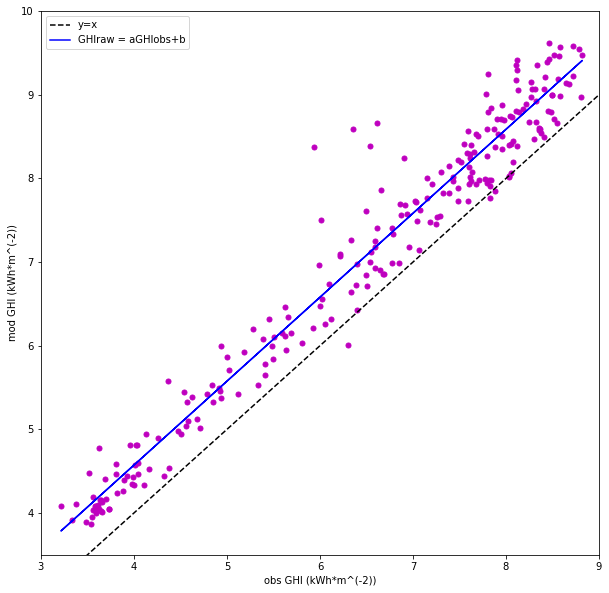

In [114]:
p1,p11 = scatter(train['GHIraw'],train['GHIobs'],'m')
MBE('initial',train['GHIraw'],train['GHIobs'])
RMSE('initial2',train['GHIraw'],train['GHIobs'])
R(train['GHIraw'],train['GHIobs'])

# Corrected data (TRAIN)

In [115]:
#correcting the satellite data
GHIcor = train['GHIraw'] - ((p1[0][0] - 1)*train['GHIobs'] +  p11)

*slope (a) is: [[1.]]
*intercept(b) is [-1.77635684e-15]
the MBE index is: -3.7142006642005235e-16
the RMSE index is: 0.2534679871260061
the R index is: 0.9781697244023533


0.9781697244023533

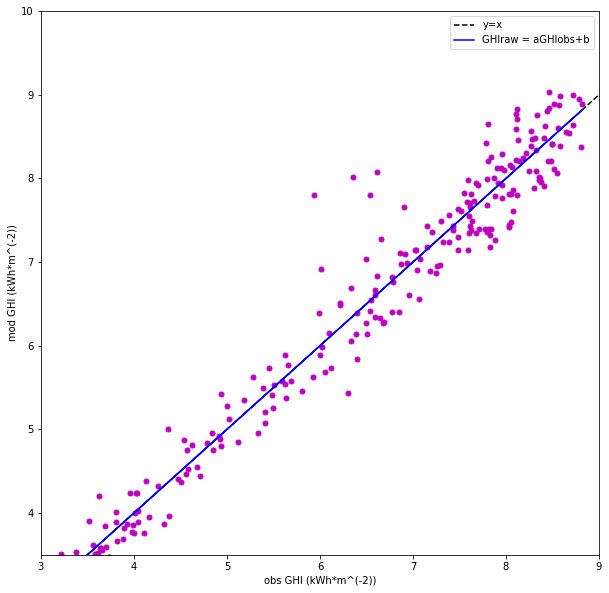

In [116]:
scatter(GHIcor,train['GHIobs'],'m')
MBE('cor', GHIcor, train['GHIobs'])
RMSE('cor2',GHIcor,train['GHIobs'])
R(GHIcor,train['GHIobs'])

# CORRECTING DATA (TEST): initial visualization and errors

*slope (a) is: [[1.00204431]]
*intercept(b) is [0.60401954]
the MBE index is: -0.31307685788928674
the RMSE index is: 0.49613320257609983
the R index is: 0.9824724698415508


0.9824724698415508

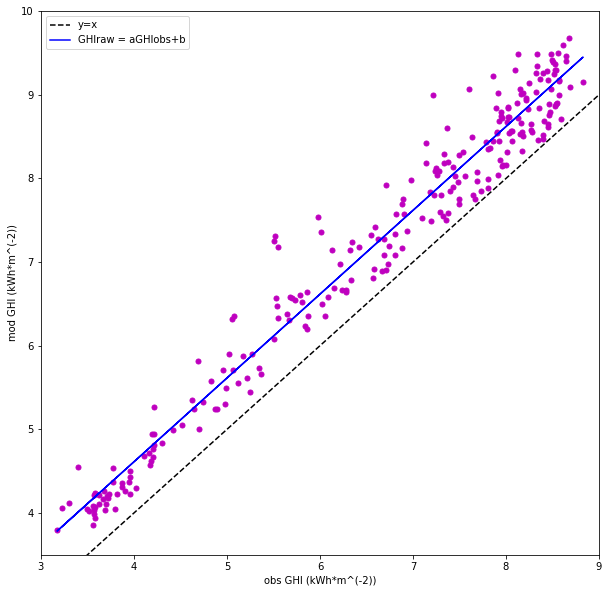

In [117]:
scatter(test['GHIraw'],test['GHIobs'],'m')
MBE('initial',test['GHIraw'],test['GHIobs'])
RMSE('initial2',test['GHIraw'],test['GHIobs'])
R(test['GHIraw'],test['GHIobs'])

# Corrected data (TEST)

*slope (a) is: [[0.996493]]
*intercept(b) is [-0.55688089]


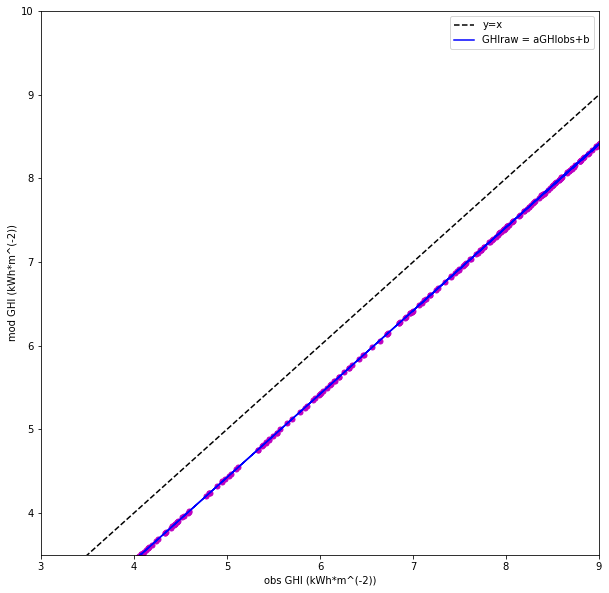

In [118]:
n,m = scatter(GHIcor,train['GHIraw'], 'm' )

*slope (a) is: [[0.99853015]]
*intercept(b) is [0.04502035]
the MBE index is: -0.017942041450347453
the RMSE index is: 0.2304547412960725
the R index is: 0.9824724698415509


0.9824724698415509

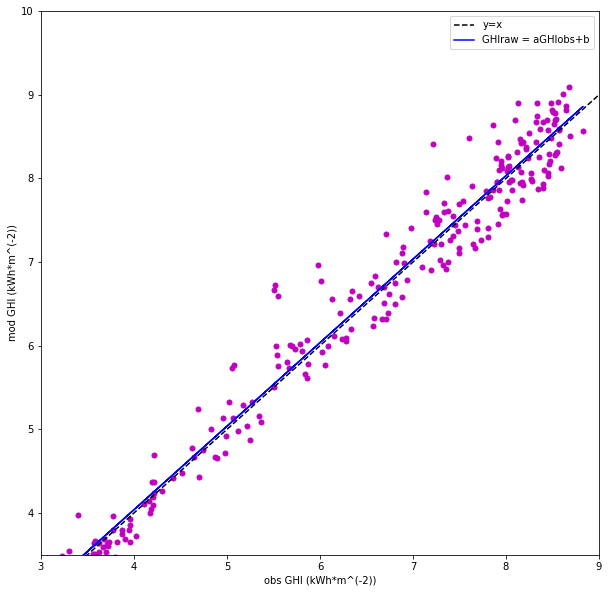

In [119]:
GHItecor = n[0][0]*test['GHIraw'] + m

scatter(GHItecor,test['GHIobs'],'m')
MBE('cor3', GHItecor, test['GHIobs'])
RMSE('cor4',GHItecor,test['GHIobs'])
R(GHItecor,test['GHIobs'])